In [274]:
!pip install nltk
!pip3 install swifter
!pip3 install PySastrawi

In [275]:
import pandas as pd # Pandas juga dapat membaca file dari berbagai format seperti .txt, .csv, .tsv, dan lainnya
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re # ekspresi reguler adalah urutan karakter khusus yang membantu Anda mencocokkan atau menemukan string atau kumpulan string lain
import string
import nltk # libray python untuk bekerja dengan permodelan teks
nltk.download('punkt')
nltk.download('stopwords')

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [276]:
!pip install sastrawi

In [277]:
from google.colab import files
uploades = files.upload()

Saving dataset-ban.csv to dataset-ban.csv


In [278]:
data = pd.read_csv("dataset-ban.csv")
data.head(200)

,Dokumen,Deskripsi
0,d1,Ban ini aus karena mengalami kerusakan dan sud...
1,d2,Ban ini aus karena sudah dibawah panah twi dan...
2,d3,Ban ini menunjukkan tanda keausan yang signifi...
3,d4,Ban ini telah mencapai masa pakainya yang maks...
4,d5,Ban tersebut terlihat aus dengan pola kembang ...
...,...,...
195,d196,Ban ini berada dalam kondisi normal dengan uku...
196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...
197,d198,Ban ini masih dalam kondisi normal dengan ukur...
198,d199,Ban ini dalam kondisi normal dan masih baru. T...


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Dokumen    200 non-null    object
 1   Deskripsi  200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [299]:
#Casefolding

import re

#fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                                    #mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\s+', ' ', text)     #menghapus URL
  #text = re.sub(r'[-+]?[0-9]+', ' ', text)               #menghapus angka
  text = re.sub(r'[^\w\s]', ' ', text)                   #menghapus karakter tanda baca
  #text = re.sub(r'[^/\w\s]|(?<!/)/(?!/)', '', text)       # Menghapus karakter tanda baca kecuali "/", angka 0-9, dan whitespace
  text = text.strip()
  return text

In [300]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)

Data awal	:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding	:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan


In [301]:
#tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [302]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)
print('Tokenize\t: ', text_tokenize)

Data awal	:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding	:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan
Tokenize	:  ['ban', 'ini', 'aus', 'karena', 'mengalami', 'kerusakan', 'dan', 'sudah', 'tipis', 'terdapat', 'retakan', 'sobekan', 'kecil', 'yang', 'kemungkinan', 'disebabkan', 'oleh', 'penggunaan', 'ban', 'yang', 'sudah', 'tua', 'dan', 'sering', 'digunakan', 'di', 'cuaca', 'panas', 'serta', 'minimnya', 'perawatan', 'yang', 'dilakukan']


In [303]:
#NORMALISASI

#corpus kumpulan slangwords dari github

!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2023-11-26 11:19:36--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.1’

key_norm.csv.1      100%[===================>]  79.07K  --.-KB/s    in 0.002s  

2023-11-26 11:19:36 (38.9 MB/s) - ‘key_norm.csv.1’ saved [80969/80969]



In [304]:
key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [305]:

def textnormalize(text):
    normalized_text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text])
    normalized_text = str.lower(normalized_text)
    return normalized_text


In [306]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)
print('Tokenize\t: ', text_tokenize)
print('Normalisasi\t: ', text_normalize)

Data awal	:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding	:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan
Tokenize	:  ['ban', 'ini', 'aus', 'karena', 'mengalami', 'kerusakan', 'dan', 'sudah', 'tipis', 'terdapat', 'retakan', 'sobekan', 'kecil', 'yang', 'kemungkinan', 'disebabkan', 'oleh', 'penggunaan', 'ban', 'yang', 'sudah', 'tua', 'dan', 'sering', 'digunakan', 'di', 'cuaca', 'panas', 'serta', 'minimnya', 'perawatan', 'yang', 'dilakukan']
Normalisasi	:  ban ini aus karena mengalami kerusakan dan sudah tipis terdapat retakan sobekan kecil yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering di

In [307]:
#filtering (stopword removal)

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [308]:
len(stopwords_ind)

758

In [309]:
#daftar stopword yang disediakan NLTK
stopwords_ind[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [310]:
#fungsi untuk langkah stopword removal

more_stopword = ['ini', 'karena', 'sudah', 'dan', 'dapat',
                 'yang', 'oleh', 'sebab', 'guna', 'di',
                 'serta', 'nya', 'dengan', 'pada', 'selain',
                 'itu', 'juga', 'jadi', 'setelah', 'dalam',
                 'kini', 'dulu', 'telah', 'bahkan', 'akibat',
                 'tersebut', 'sebut', 'tidak', 'ketika', 'atau',
                 'ke', 'terhadap', 'sehingga', 'hingga', 'bagian', 'secara',
                 'hal', 'saat', 'manuver', 'medan', 'sedangkan', 'mungkin',
                 'bahwa', 'perlu', 'bisa', 'segera', 'saat', 'adalah',
                 'daya', 'merek', 'untuk', 'umur', 'zat', 'lainnya',
                 'lain', 'rasa', 'kord', 'benjolan', 'lihat', 'kontak',
                 'seperti', 'serius', 'lewat', 'mencurigakan', 'curiga',
                 'tanpa', 'panah', 'r']        #tambah kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [311]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)
stopword_removal =  remove_stop_words(text_normalize)

print('Data awal\t\t: ', data_awal)
print('Case folding\t\t: ', case_folding)
print('Tokenize\t\t: ', text_tokenize)
print('Normalisasi\t\t: ', text_normalize)
print('Stopword removal\t: ', stopword_removal)

Data awal		:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding		:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan
Tokenize		:  ['ban', 'ini', 'aus', 'karena', 'mengalami', 'kerusakan', 'dan', 'sudah', 'tipis', 'terdapat', 'retakan', 'sobekan', 'kecil', 'yang', 'kemungkinan', 'disebabkan', 'oleh', 'penggunaan', 'ban', 'yang', 'sudah', 'tua', 'dan', 'sering', 'digunakan', 'di', 'cuaca', 'panas', 'serta', 'minimnya', 'perawatan', 'yang', 'dilakukan']
Normalisasi		:  ban ini aus karena mengalami kerusakan dan sudah tipis terdapat retakan sobekan kecil yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan serin

In [312]:
#stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.Stemmer.Context.Visitor.VisitorProvider import VisitorProvider

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemming aturan khusus
custom_dictionary = {
    'kerusakan': 'rusak',
    'retakan': 'retak',
    'perawatan': 'rawat'
}

#fungsi untuk langkah stemming bahasa indonesia
def stemming(text):
    stemmed_words = []
    text = text.split()
    for word in text:
        if word in custom_dictionary:
            stemmed_word = custom_dictionary[word]
        else:
            stemmed_word = stemmer.stem(word)
        stemmed_words.append(stemmed_word)
    text = ' '.join(stemmed_words)
    return text

In [313]:
data_awal = data['Deskripsi'].iloc[0]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)
stopword_removal =  remove_stop_words(text_normalize)
text_stemming = stemming(stopword_removal)

print('Data awal\t\t: ', data_awal)
print('Case folding\t\t: ', case_folding)
print('Tokenize\t\t: ', text_tokenize)
print('Normalisasi\t\t: ', text_normalize)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Data awal		:  Ban ini aus karena mengalami kerusakan dan sudah tipis, terdapat retakan sobekan kecil, yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas, serta minimnya perawatan yang dilakukan.
Case folding		:  ban ini aus karena mengalami kerusakan dan sudah tipis  terdapat retakan sobekan kecil  yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan sering digunakan di cuaca panas  serta minimnya perawatan yang dilakukan
Tokenize		:  ['ban', 'ini', 'aus', 'karena', 'mengalami', 'kerusakan', 'dan', 'sudah', 'tipis', 'terdapat', 'retakan', 'sobekan', 'kecil', 'yang', 'kemungkinan', 'disebabkan', 'oleh', 'penggunaan', 'ban', 'yang', 'sudah', 'tua', 'dan', 'sering', 'digunakan', 'di', 'cuaca', 'panas', 'serta', 'minimnya', 'perawatan', 'yang', 'dilakukan']
Normalisasi		:  ban ini aus karena mengalami kerusakan dan sudah tipis terdapat retakan sobekan kecil yang kemungkinan disebabkan oleh penggunaan ban yang sudah tua dan serin

In [314]:
#fungsi unruk menggabungkan seluruh langkah preprocessing

def text_preprocessing_process(text):
  text = casefolding(text)
  text = tokenize_text(text)
  text = textnormalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [315]:
#waktu komputasi ketika proses text processing
%%time
data['clean_teks'] = data['Deskripsi'].apply(text_preprocessing_process)


CPU times: user 14.4 s, sys: 81.9 ms, total: 14.4 s
Wall time: 14.8 s


In [316]:
data

,Dokumen,Deskripsi,clean_teks
0,d1,Ban ini aus karena mengalami kerusakan dan sud...,ban aus alami rusak tipis retak sobek sebab gu...
1,d2,Ban ini aus karena sudah dibawah panah twi dan...,ban aus bawah twi alami rusak parah sobek teks...
2,d3,Ban ini menunjukkan tanda keausan yang signifi...,ban tanda aus signifikan pakai jalan jarak lew...
3,d4,Ban ini telah mencapai masa pakainya yang maks...,ban capai pakai maksimal tapak ban halus aus a...
4,d5,Ban tersebut terlihat aus dengan pola kembang ...,ban aus pola kembang kikis atur jalan basah ce...
...,...,...,...
195,d196,Ban ini berada dalam kondisi normal dengan uku...,ban kondisi normal ukur ban 195i65 r15 twi tap...
196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...,ban normal ukur ban 215i60 r16 twi tapak ban m...
197,d198,Ban ini masih dalam kondisi normal dengan ukur...,ban kondisi normal ukur ban 185i55 r15 twi tap...
198,d199,Ban ini dalam kondisi normal dan masih baru. T...,ban kondisi normal bulu karet tapak ban jarak ...


In [322]:
#simpan data agar tidak menjalankan proses ulang
data.to_csv('clean_data.csv')

In [317]:
#import library wordcloud. wordcloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul
#import library cv2 untuk mengolah gambar manjadi masking wourdcloud

import cv2
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [318]:
#download gammbbar masking dari github
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2023-11-26 11:22:48--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.001s  

2023-11-26 11:22:49 (25.2 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [320]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 225, cv2.THRESH_BINARY)

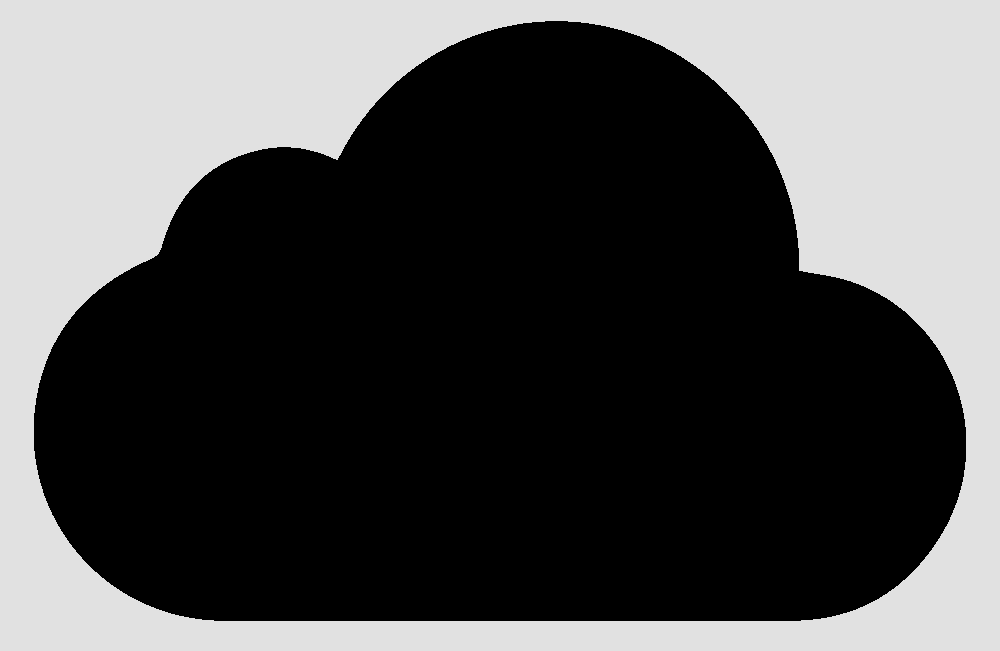

In [321]:
#TAMPILKAN MASKING
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

In [328]:
data = pd.read_csv('clean_data.csv')

In [329]:
data

,Unnamed: 0,Dokumen,Deskripsi,clean_teks
0,0,d1,Ban ini aus karena mengalami kerusakan dan sud...,ban aus alami rusak tipis retak sobek sebab gu...
1,1,d2,Ban ini aus karena sudah dibawah panah twi dan...,ban aus bawah twi alami rusak parah sobek teks...
2,2,d3,Ban ini menunjukkan tanda keausan yang signifi...,ban tanda aus signifikan pakai jalan jarak lew...
3,3,d4,Ban ini telah mencapai masa pakainya yang maks...,ban capai pakai maksimal tapak ban halus aus a...
4,4,d5,Ban tersebut terlihat aus dengan pola kembang ...,ban aus pola kembang kikis atur jalan basah ce...
...,...,...,...,...
195,195,d196,Ban ini berada dalam kondisi normal dengan uku...,ban kondisi normal ukur ban 195i65 r15 twi tap...
196,196,d197,Ban ini tetap normal dengan ukuran ban 215I60 ...,ban normal ukur ban 215i60 r16 twi tapak ban m...
197,197,d198,Ban ini masih dalam kondisi normal dengan ukur...,ban kondisi normal ukur ban 185i55 r15 twi tap...
198,198,d199,Ban ini dalam kondisi normal dan masih baru. T...,ban kondisi normal bulu karet tapak ban jarak ...


In [330]:
all_text = ' '.join(data['clean_teks'].astype(str))

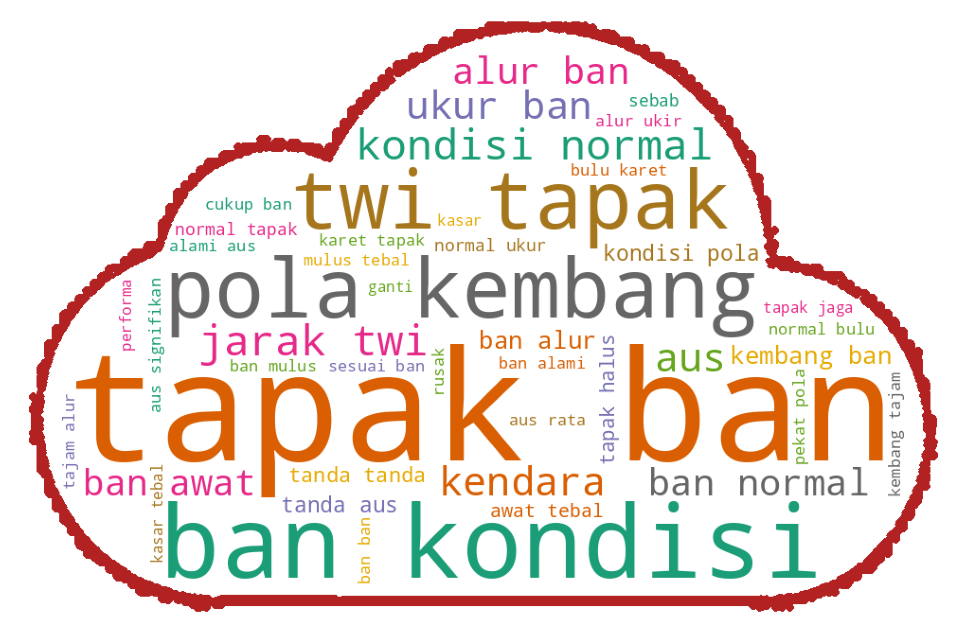

In [348]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=15,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=250).generate(all_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [350]:
data = pd.read_csv('clean_data.csv')

In [354]:
filtered_data = data.loc[0:99, 'clean_teks']

In [355]:
aus_text = ' '.join(filtered_data.astype(str))

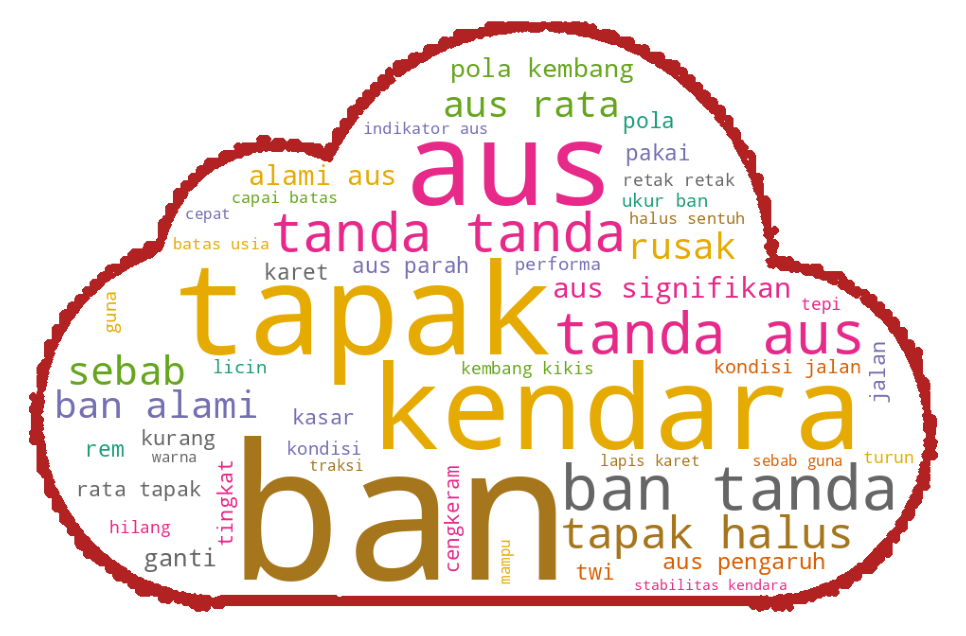

In [357]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=15,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=200).generate(aus_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [358]:
data = pd.read_csv('clean_data.csv')

In [359]:
filtered_data = data.loc[100:199, 'clean_teks']

In [360]:
normal_text = ' '.join(filtered_data.astype(str))

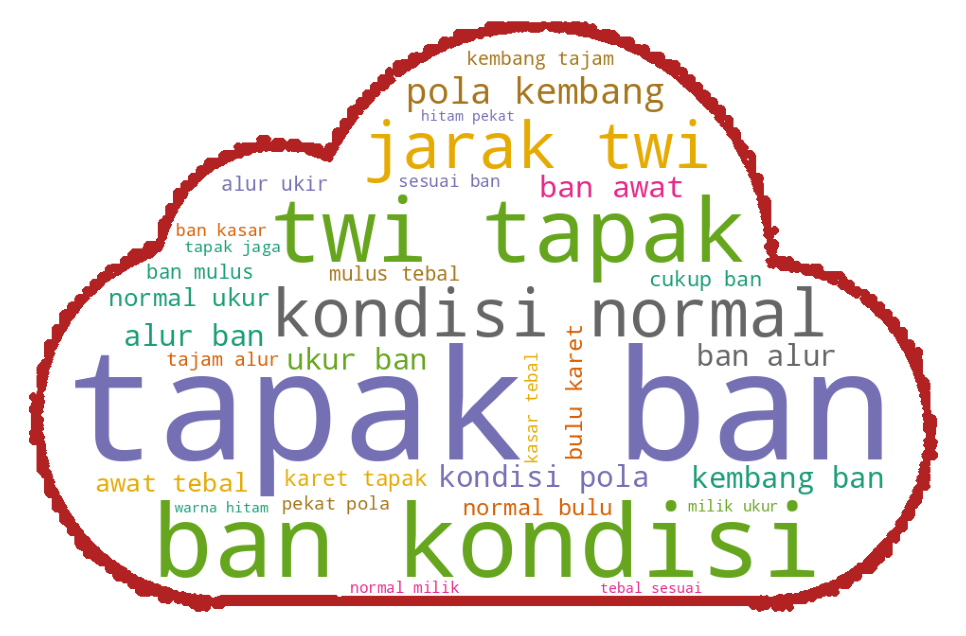

In [361]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=15,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=200).generate(normal_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()